In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pmdarima as ar

In [3]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
df=pd.read_csv("D:\\timeseries.csv")
df

,project,article,usersActivity,timestamp,access,agent,views
0,en.wikipedia,Time_series,daily,2019010100,all-access,user,502
1,en.wikipedia,Time_series,daily,2019010200,all-access,user,1073
2,en.wikipedia,Time_series,daily,2019010300,all-access,user,1286
3,en.wikipedia,Time_series,daily,2019010400,all-access,user,1255
4,en.wikipedia,Time_series,daily,2019010500,all-access,user,1124
...,...,...,...,...,...,...,...
725,en.wikipedia,Time_series,daily,2020122700,all-access,user,795
726,en.wikipedia,Time_series,daily,2020122800,all-access,user,648
727,en.wikipedia,Time_series,daily,2020122900,all-access,user,732
728,en.wikipedia,Time_series,daily,2020123000,all-access,user,904


In [3]:
df.shape

(730, 7)

In [4]:
df.isnull().sum()

project          0
article          0
usersActivity    0
timestamp        0
access           0
agent            0
views            0
dtype: int64

In [5]:
type(df.timestamp)

pandas.core.series.Series

In [6]:
df['timestamp'] = df['timestamp'].astype(str)

In [7]:
df['timestamp'] = df['timestamp'].apply(lambda x: x[0:4]+"-"+x[4:6]+"-"+x[6:8])


In [8]:
df.head()

,project,article,usersActivity,timestamp,access,agent,views
0,en.wikipedia,Time_series,daily,2019-01-01,all-access,user,502
1,en.wikipedia,Time_series,daily,2019-01-02,all-access,user,1073
2,en.wikipedia,Time_series,daily,2019-01-03,all-access,user,1286
3,en.wikipedia,Time_series,daily,2019-01-04,all-access,user,1255
4,en.wikipedia,Time_series,daily,2019-01-05,all-access,user,1124


In [9]:
df.drop(['project','article','access','agent','usersActivity'],axis=1,inplace=True)

In [10]:
df

,timestamp,views
0,2019-01-01,502
1,2019-01-02,1073
2,2019-01-03,1286
3,2019-01-04,1255
4,2019-01-05,1124
...,...,...
725,2020-12-27,795
726,2020-12-28,648
727,2020-12-29,732
728,2020-12-30,904


In [11]:
df.to_csv("new_data.csv",index=False)


In [12]:
pageviews = pd.read_csv("new_data.csv",index_col=[0],parse_dates=True,squeeze=True)

In [13]:
pageviews

timestamp
2019-01-01     502
2019-01-02    1073
2019-01-03    1286
2019-01-04    1255
2019-01-05    1124
              ... 
2020-12-27     795
2020-12-28     648
2020-12-29     732
2020-12-30     904
2020-12-31     705
Name: views, Length: 730, dtype: int64

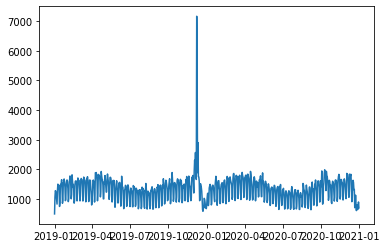

In [14]:
plt.plot(pageviews)

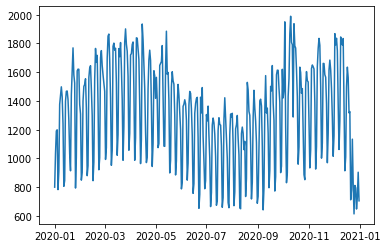

In [15]:
plt.plot(pageviews['2020'])

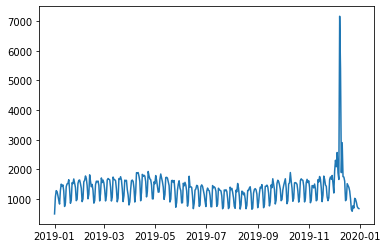

In [18]:
plt.plot(pageviews['2019'])

In [39]:
from statsmodels.tsa.stattools import adfuller

In [42]:
pip install statsmodels

You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  730 non-null    object
 1   views      730 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.5+ KB


In [20]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(df):
  rolling_mean = df.rolling(window = 12).mean()
  rolling_std = df.rolling(window = 12).std()

  plt.plot(df,color="red",label="Original Curve")
  plt.plot(rolling_mean,color="blue",label="Rolling mean")
  plt.plot(rolling_std,color="green",label="Rolling std")
  plt.legend(loc="best")
  plt.title("Original vs. Mean vs. Std")
  plt.show()

  dfresult = adfuller(df,autolag="AIC")
  print("Results of Dickey Fuller test: ")
  print("Test Statistic: ",dfresult[0])
  print("p-value: ",dfresult[1])
  print("#Lags used: ",dfresult[2])
  print("#Observations used: ",dfresult[3])

  for key,value in dfresult[4].items():
    print("Critical Value {}: {}".format(key,value))

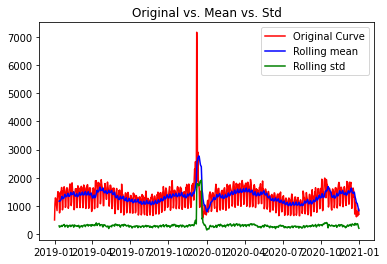

Results of Dickey Fuller test: 
Test Statistic:  -3.885851397786495
p-value:  0.0021414759415742247
#Lags used:  20
#Observations used:  709
Critical Value 1%: -3.439606888036868
Critical Value 5%: -2.865625121924057
Critical Value 10%: -2.5689454046801052


In [21]:
check_stationarity(pageviews)

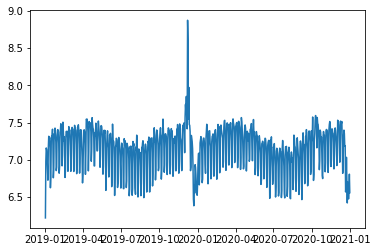

In [22]:
import numpy as np
log_df = np.log(pageviews)
plt.plot(log_df)

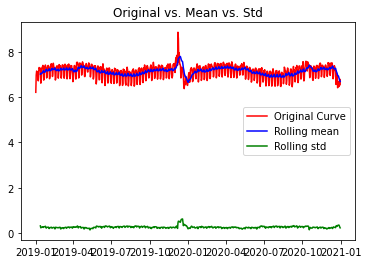

Results of Dickey Fuller test: 
Test Statistic:  -2.9986950829948955
p-value:  0.03501644293846034
#Lags used:  20
#Observations used:  709
Critical Value 1%: -3.439606888036868
Critical Value 5%: -2.865625121924057
Critical Value 10%: -2.5689454046801052


In [23]:
check_stationarity(log_df)


In [24]:
print(log_df.shape)

(730,)


In [25]:
train=log_df[:630]
test=log_df[630:]
print(train.shape,test.shape)

(630,) (100,)


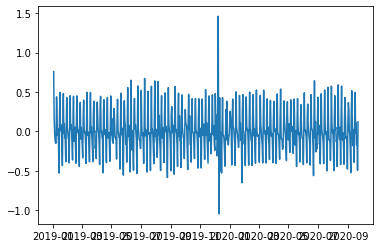

In [26]:
log_df_diff = train - train.shift()
log_df_diff.dropna(inplace=True)
plt.plot(log_df_diff)

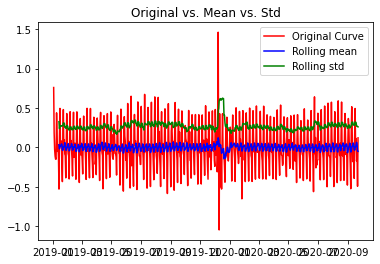

Results of Dickey Fuller test: 
Test Statistic:  -7.95620100021389
p-value:  3.0326815776622687e-12
#Lags used:  20
#Observations used:  608
Critical Value 1%: -3.4411511898545206
Critical Value 5%: -2.866305414688104
Critical Value 10%: -2.569307861950312


In [27]:
check_stationarity(log_df_diff)

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


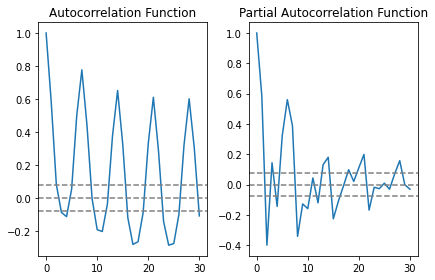

In [28]:
from statsmodels.tsa.stattools import acf,pacf

lags_acf = acf(train, nlags=30)
lags_pacf = pacf(train, nlags=30,method="ols")

plt.subplot(121) 
plt.plot(lags_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lags_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

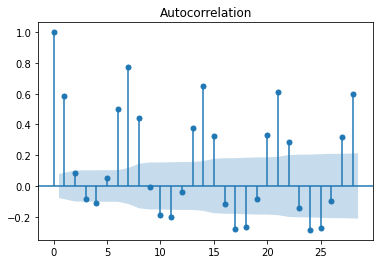

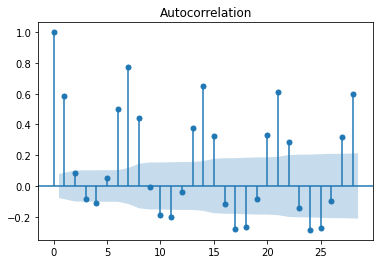

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(train)

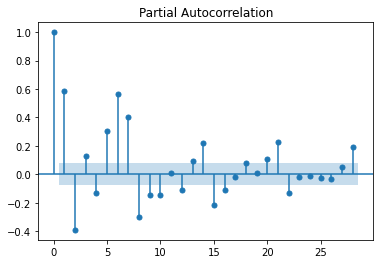

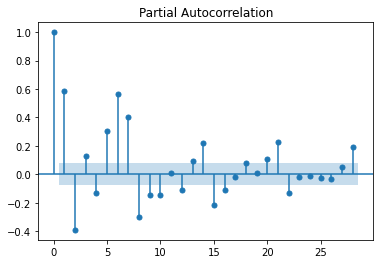

In [30]:
plot_pacf(train)

In [31]:
from statsmodels.tsa.arima_model import ARIMA

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date

Text(0.5, 1.0, 'RSS: 13.5060')

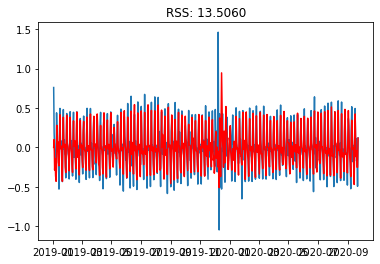

In [32]:
model_AR = ARIMA(train, order=(10, 1, 0))  
results_AR = model_AR.fit(disp=-1)  
plt.plot(log_df_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-log_df_diff)**2))

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Text(0.5, 1.0, 'RSS: 28.3686')

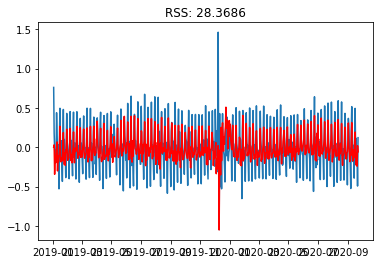

In [34]:
model_MA = ARIMA(train, order=(0, 1, 3))  
results_MA = model_MA.fit(disp=-1)  
plt.plot(log_df_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-log_df_diff)**2))

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: Future

Text(0.5, 1.0, 'RSS: 12.5933')

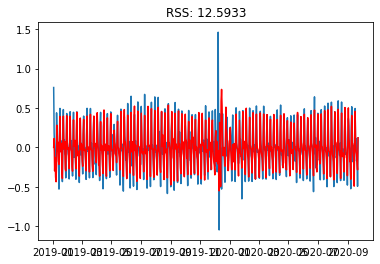

In [35]:
model_ARIMA = ARIMA(train, order=(10, 1, 3))  
results_ARIMA = model_ARIMA.fit(disp=-1)  
plt.plot(log_df_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-log_df_diff)**2))

In [41]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(train, trace=True,start_p=9,max_p=16,d=1,start_q=1,max_q=8,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(9,1,1)(0,0,0)[0] intercept   : AIC=-620.159, Time=3.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=128.934, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=122.194, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=95.989, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=126.941, Time=0.05 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=-619.588, Time=2.70 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=-626.257, Time=2.32 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=-617.486, Time=1.97 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=-628.044, Time=3.28 sec
 ARIMA(11,1,0)(0,0,0)[0] intercept   : AIC=-630.813, Time=3.42 sec
 ARIMA(12,1,0)(0,0,0)[0] intercept   : AIC=-646.530, Time=4.17 sec
 ARIMA(13,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=5.44 sec
 ARIMA(12,1,1)(0,0,0)[0] intercept   : AIC=-651.780, Time=4.72 sec
 ARIMA(11,1,1)(0,0,0)[0] intercept   : AIC=-624.115, Time=4.25 sec
 ARIMA(13,1,1)(0,0,0)[0] intercept   

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: Future

Text(0.5, 1.0, 'RSS: 11.0592')

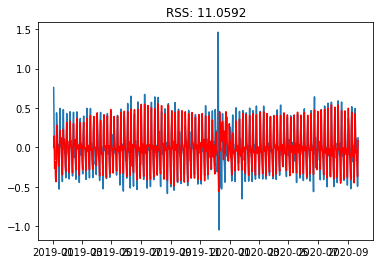

In [36]:
model_ARIMA2 = ARIMA(train, order=(12, 1, 4))  
results_ARIMA2 = model_ARIMA2.fit(disp=-1)  
plt.plot(log_df_diff)
plt.plot(results_ARIMA2.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA2.fittedvalues-log_df_diff)**2))

In [44]:
results_ARIMA2.summary()

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.views   No. Observations:                  629
Model:                ARIMA(12, 1, 4)   Log Likelihood                 394.722
Method:                       css-mle   S.D. of innovations              0.128
Date:                Sun, 18 Apr 2021   AIC                           -753.443
Time:                        19:38:27   BIC                           -673.449
Sample:                             1   HQIC                          -722.369
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0007      0.002      0.373      0.709      -0.003       0.005
ar.L1.D.views      0.4248        nan        nan        nan         nan         nan
ar.L2.D.views     -1.4654        nan        nan        nan         nan         nan
ar.L3.D.views      0.4454      0.019     22.856      0.000       0.407       0.484
ar.L4.D.views     -1.3198      0.023    -57.216      0.000      -1.365      -1.275
ar.L5.D.views     -0.1535      0.043     -3.579      0.000      -0.238      -0.069
ar.L6.D.views     -0.6353        nan        nan        nan         nan         nan
ar.L7.D.views      0.1070      0.035      3.031      0.002       0.038       0.176
ar.L8.D.views     -0.5500        nan        nan        nan         nan         nan
ar.L9.D.views      0.2135        nan        nan        nan         nan         nan
ar.L10.D.views    -0.4353      0.022    -19.551      0.000      -0.479      -0.392
ar.L11.D.views     0.1837      0.012     15.266      0.000       0.160       0.207
ar.L12.D.views    -0.1773      0.020     -8.962      0.000      -0.216      -0.139
ma.L1.D.views     -0.8126      0.019    -43.717      0.000      -0.849      -0.776
ma.L2.D.views      1.3724      0.010    132.762      0.000       1.352       1.393
ma.L3.D.views     -0.8184        nan        nan        nan         nan         nan
ma.L4.D.views      0.9242        nan        nan        nan         nan         nan
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0264           -0.5257j            1.1532           -0.4247
AR.2            -1.0264           +0.5257j            1.1532            0.4247
AR.3            -0.2223           -0.9751j            1.0001           -0.2857
AR.4            -0.2223           +0.9751j            1.0001            0.2857
AR.5            -0.4446           -1.0819j            1.1697           -0.3121
AR.6            -0.4446           +1.0819j            1.1697            0.3121
AR.7             0.6235           -0.7825j            1.0005           -0.1429
AR.8             0.6235           +0.7825j            1.0005            0.1429
AR.9             1.1103           -0.7053j            1.3154           -0.0901
AR.10            1.1103           +0.7053j            1.3154            0.0901
AR.11            0.4774           -1.2494j            1.3375           -0.1919
AR.12            0.4774           +1.2494j            1.3375            0.1919
MA.1             0.6664           -0.7875j            1.0316           -0.1382
MA.2             0.6664           +0.7875j            1.0316            0.1382
MA.3            -0.2236           -0.9833j            1.0084           -0.2856
MA.4            -0.2236           +0.9833j            1.0084            0.2856
-

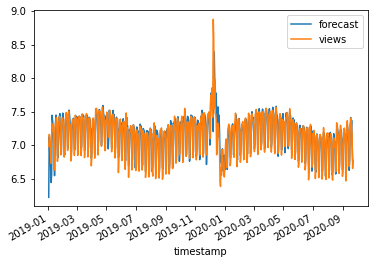

In [43]:
results_ARIMA2.plot_predict(dynamic=False)
plt.show()

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='timestamp'>

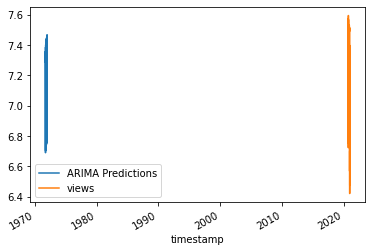

In [45]:
start=len(train)
end=len(train)+len(test)-1
pred=results_ARIMA2.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)

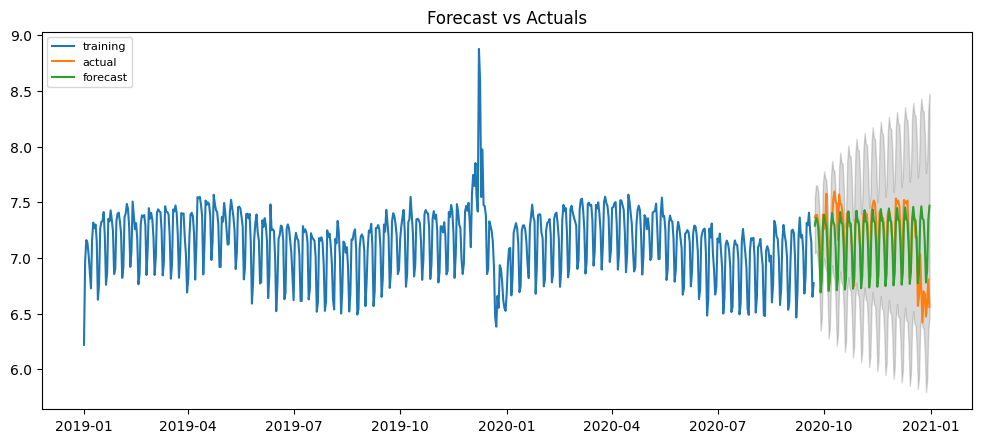

In [40]:
fc, se, conf = results_ARIMA2.forecast(len(test), alpha=0.05)  

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()